Enabling multithreading for training...
Loading images...
Loaded 24320 images.
Encoding labels...
Encoded labels: ['Dataset of Artificial Maksed Original_(0-10)_Female'
 'Dataset of Artificial Maksed Original_(0-10)_Male'
 'Dataset of Artificial Maksed Original_(11-20)_Female'
 'Dataset of Artificial Maksed Original_(11-20)_Male'
 'Dataset of Artificial Maksed Original_(21-30)_Female'
 'Dataset of Artificial Maksed Original_(21-30)_Male'
 'Dataset of Artificial Maksed Original_(31-40)_Female'
 'Dataset of Artificial Maksed Original_(31-40)_Male'
 'Dataset of Artificial Maksed Original_(41-50)_Female'
 'Dataset of Artificial Maksed Original_(41-50)_Male'
 'Dataset of Artificial Maksed Original_(51-60)_Female'
 'Dataset of Artificial Maksed Original_(51-60)_Male'
 'Dataset of Artificial Maksed Original_(61-70)_Female'
 'Dataset of Artificial Maksed Original_(61-70)_Male'
 'Dataset of Artificial Maksed Original_(71-80)_Female'
 'Dataset of Artificial Maksed Original_(71-80)_Male'
 'Datset

c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the MLP model...
Epoch 1/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 28s 27ms/step - accuracy: 0.0672 - loss: 3.2734 - val_accuracy: 0.1571 - val_loss: 2.1944
Epoch 2/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.1252 - loss: 2.4880 - val_accuracy: 0.1631 - val_loss: 2.0340
Epoch 3/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.1324 - loss: 2.3708 - val_accuracy: 0.1807 - val_loss: 1.9964
Epoch 4/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.1362 - loss: 2.3229 - val_accuracy: 0.1830 - val_loss: 1.9737
Epoch 5/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1449 - loss: 2.3074 - val_accuracy: 0.2229 - val_loss: 1.9502
Epoch 6/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.1576 - loss: 2.2403 - val_accuracy: 0.2167 - val_loss: 1.9068
Epoch 7/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.1657 - loss: 2.2349 - val_accuracy: 0.2448 - val_loss: 1.8806
Epoch 8/300
426/426 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accu

c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\M.Ubaid Ullah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Accuracy: 0.28022203947368424
Classification Report:
                                                      precision    recall  f1-score   support

 Dataset of Artificial Maksed Original_(0-10)_Female       0.36      0.28      0.32       145
   Dataset of Artificial Maksed Original_(0-10)_Male       0.59      0.14      0.22       138
Dataset of Artificial Maksed Original_(11-20)_Female       0.98      0.31      0.47       154
  Dataset of Artificial Maksed Original_(11-20)_Male       0.00      0.00      0.00       149
Dataset of Artificial Maksed Original_(21-30)_Female       0.20      0.54      0.29       186
  Dataset of Artificial Maksed Original_(21-30)_Male       0.00      0.00      0.00       156
Dataset of Artificial Maksed Original_(31-40)_Female       0.00      0.00      0.00       145
  Dataset of Artificial Maksed Original_(31-40)_Male       0.37      0.41      0.39       143
Dataset of Artificial Maksed Original_(41-50)_Female       0.00      0.00      0.00       161
  Data

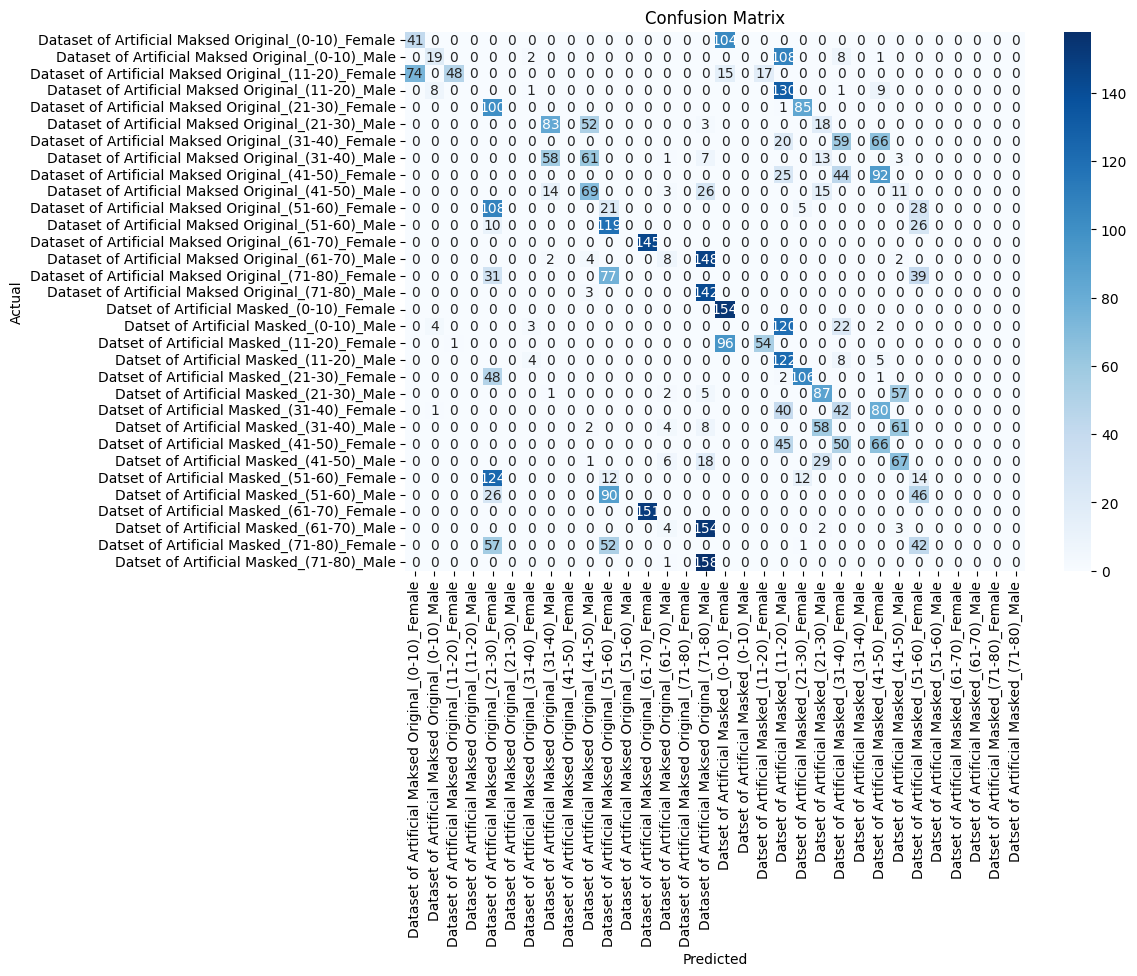

Saving the trained model and the label encoder...
Trained model and label encoder saved successfully!


In [1]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import joblib

print("Enabling multithreading for training...")
os.environ['OMP_NUM_THREADS'] = str(os.cpu_count())

# Function to load images and extract HOG features
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        if len(files) == 0:
            continue  # Skip empty directories
        for file in files:
            img_path = os.path.join(subdir, file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img_resized = cv2.resize(img, (128, 128))
                hog_features = hog(img_resized, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                images.append(hog_features)
                subdir_split = subdir.split(os.sep)
                if len(subdir_split) >= 2:
                    labels.append(subdir_split[-2] + "_" + subdir_split[-1])  # Combining gender and age as label
                else:
                    labels.append(subdir_split[-1])  # Use the subdir as label
    return images, labels

# Load the dataset
data_folder = 'Dataset'
print("Loading images...")
images, labels = load_images_from_folder(data_folder)
print(f"Loaded {len(images)} images.")

# Encode labels
print("Encoding labels...")
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_categorical = to_categorical(labels_encoded)
print(f"Encoded labels: {label_encoder.classes_}")

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

# Convert to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# Verify the shape of the HOG features
input_shape = X_train.shape[1]
print(f"Input shape: {input_shape}")

# Build MLP model
print("Building the MLP model...")
model = Sequential([
    Dense(128, input_shape=(input_shape,), activation='relu'),
    Dropout(0.5),  # Dropout layer with 50% rate
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Train the MLP model
print("Training the MLP model...")
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.3, verbose=1, callbacks=[early_stopping])
print("Training completed.")

# Predict on test set
print("Predicting on test set...")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate the classifier
print("Evaluating the classifier...")
accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

# Evaluate the model
print("Evaluating the model...")
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics:")
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Plot the confusion matrix
print("Plotting the confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the trained model and the label encoder
print("Saving the trained model and the label encoder...")
model.save('mlp_image_classification_model.h5')
joblib.dump(label_encoder, 'label_encoder.pkl')
print("Trained model and label encoder saved successfully!")
